**Import Libraries**

In [29]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
# from tensorflow.keras import backend
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
# from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten 
from keras.layers.normalization import BatchNormalization
from keras import regularizers
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
batch_size = 32
num_classes = 10
epochs = 50

**load dataset**

In [9]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("x_train shape: ", x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape:  (50000, 32, 32, 3)
50000 train samples
10000 test samples


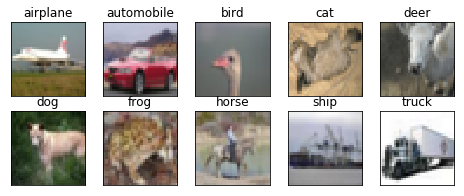

In [10]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer'
              , 'dog', 'frog', 'horse', 'ship', 'truck']

fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:] == i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = (features_idx[img_num, ::])
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show() 

**One Hot encode target values**

In [11]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

**Convert from integers to floats**

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

**Normalize data to range 0-1**

In [ ]:
x_train /= 255
x_test /= 255

**Build our model classifier**

In [12]:
model = Sequential()
# First Conv layer
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape = x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Second Conv layer
model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout of 25 % of neurons to avoid overfitting
model.add(Dropout(0.25))


# Third Conv layer
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Fourth Conv layer
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Fifth Conv layer
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# sixth Conv layer
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Fully Connected layers
model.add(Flatten())
model.add(Dense(512, kernel_regularizer= regularizers.l2(0.01)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [13]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)       

**Cost Function & Optimizer**

In [14]:
model.compile(loss= 'categorical_crossentropy',
              optimizer= 'sgd',
              metrics= ['accuracy'])

**Train the network**

In [15]:
history = model.fit(x_train,  y_train,
              batch_size= batch_size,
              epochs= epochs,
              validation_data= (x_test, y_test),
              shuffle= True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 247s 5ms/step - loss: 5.5142 - accuracy: 0.3812 - val_loss: 4.5406 - val_accuracy: 0.3625
Epoch 2/50
50000/50000 [==============================] - 243s 5ms/step - loss: 3.3424 - accuracy: 0.5230 - val_loss: 2.6867 - val_accuracy: 0.5611
Epoch 3/50
50000/50000 [==============================] - 239s 5ms/step - loss: 2.2407 - accuracy: 0.5931 - val_loss: 1.9927 - val_accuracy: 0.5726
Epoch 4/50
50000/50000 [==============================] - 239s 5ms/step - loss: 1.6469 - accuracy: 0.6294 - val_loss: 1.3928 - val_accuracy: 0.6574
Epoch 5/50
50000/50000 [==============================] - 240s 5ms/step - loss: 1.3070 - accuracy: 0.6604 - val_loss: 1.2081 - val_accuracy: 0.6620
Epoch 6/50
50000/50000 [==============================] - 239s 5ms/step - loss: 1.1089 - accuracy: 0.6822 - val_loss: 1.1359 - val_accuracy: 0.6640
Epoch 7/50
50000/50000 [==============================] - 239s

**Evaluate model**

In [21]:
_, acc = model.evaluate(x_test, y_test, verbose=0)
print(acc)

0.838199973106


**list all data in history**

['loss', 'val_accuracy', 'val_loss', 'accuracy']


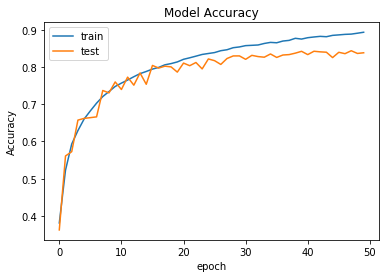

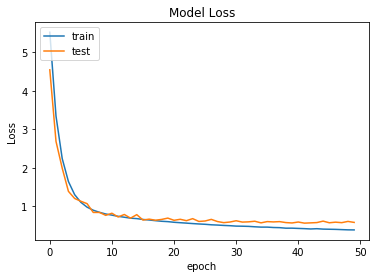

In [20]:
print(history.history.keys())
#Summarize history for Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Summarize history for Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


**Save Model**

In [22]:
model.save('final_model.h5')

**Make a prediction for a new image**

In [2]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

Using TensorFlow backend.


In [8]:
def prepare_image(imagename):
    # load the image
    img = load_img(imagename, target_size=(32, 32))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 3 channels
    img = img.reshape(1, 32, 32, 3)
    # prepare pixel data
    img = img.astype('float32')
    # normalize image 
    img = img / 255.0
    return img
 
# load an image and predict the class
def predict_image_label():
    # load the image
    img = prepare_image('TestData/Ship.jpeg')
    # load model
    model = load_model('final_model.h5')
    # predict the class
    result = model.predict_classes(img)
    
    print(result[0])

    if result[0] == 0: 
        print("airplane") 
    elif result[0] == 1: 
        print('Automobile') 
    elif result[0] == 2: 
        print('Bird') 
    elif result[0] == 3: 
        print('Cat') 
    elif result[0] == 4: 
        print('Deer') 
    elif result[0] == 5: 
        print('Dog') 
    elif result[0] == 6: 
        print('Frog') 
    elif result[0] == 7: 
        print('Horse') 
    elif result[0] == 8: 
        print('Ship') 
    elif result[0] == 9: 
        print('Truck') 
    else: 
        print('Error')

# predict image label    
predict_image_label()


8
Ship
